In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

IMPORTING AND LOADING THE DATASET

In [2]:
#import the dataset
from sklearn.datasets import fetch_california_housing

#load the dataset as pandas dataframe
housing = fetch_california_housing(as_frame=True)

#Access the actual df
df= housing.frame

#view the first 5 rows
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


DATA EXPLORING

In [3]:
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


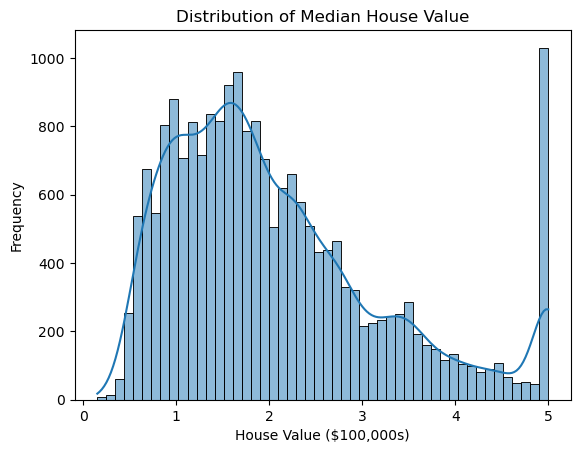

In [5]:
'''plot a histogram of MedHouseVal, which is your target column (the thing you're trying to predict).

This helps answer:

Are house values mostly low, high, or spread out?

Is there any weird skew or cutoff?'''

sns.histplot(df['MedHouseVal'],bins=50,kde=True)
#bins=50 -> Divide all the house prices into 50 equal ranges, and count how many houses fall into each
#kde -> stands for Kernel Density Estimate. Draw a smooth curved line that shows the shape of the data.

plt.title("Distribution of Median House Value") #title of the plot
#label the histogram
plt.xlabel("House Value ($100,000s)")
plt.ylabel("Frequency")

#plot the histogram
plt.show()

TRAIN-TEST SPLIT

🧠 Theory: Why Do We Split the Data?
When building ML models, we always divide the dataset into:

Training set — what the model learns from (usually 70–80%)

Testing set — what we use to evaluate how well it learned (the remaining 20–30%)

This helps us test the model on unseen data, like it’s predicting for new houses in the real world.

In [6]:
#split the dataset into training and testing parts
from sklearn.model_selection import train_test_split

# Step 1: Define features (X) and target (y)
X = df.drop('MedHouseVal', axis=1)  # Drop the target column from features, axis=0 ➝ drop a row, axis=1 ➝ drop a column
y = df['MedHouseVal']               # This is the target we want to predict

X_train, X_test, y_train, y_test= train_test_split( X, y, test_size=0.2, random_state=42)
#X_train, y_train → used to train the model
#X_test, y_test → used to test the model afterward
#test_size=0.2 → 20% for testing, 80% for training
#random_state=42 → ensures you get the same split every time (makes it reproducible)

TRAIN A LINEAR REGRESSION MODEL

What is Linear Regression?
Linear Regression is like drawing a best-fit line through your data.
It tries to learn a formula:

house_price = a × MedInc + b × HouseAge + ... + z

It adjusts the weights (a, b, etc.) to minimize error between predicted and actual prices.

In [7]:
from sklearn.linear_model import LinearRegression 

#Create an empty model
model = LinearRegression()

#This is the training step.
#It tells the model:
#“Here are the house features (X_train), and here are the actual prices (y_train) — figure out the pattern!”
model.fit(X_train, y_train)

LinearRegression()

 model is trained and ready to make predictions!


EVALUATE THE MODEL

In [8]:
from sklearn.metrics import mean_squared_error, r2_score

mean_squared_error shows how far off the predictions are

r2_score tells you how much of the variation in prices the model explains (closer to 1.0 is better)

In [9]:
#make predictions
y_pred = model.predict(X_test)   # This uses your trained model to predict prices for the test data.

#Evaluate performance
mse= mean_squared_error(y_test, y_pred)
r2= r2_score(y_test, y_pred)

print(f'The Mean Squared Error is: {mse:.4f}')
print(f'The R2 score is: {r2:.4f}')

The Mean Squared Error is: 0.5559
The R2 score is: 0.5758


How to Interpret the Results: 

MSE (Mean Squared Error)
Lower is better. If it’s large, your predictions are off by a lot.

R² Score (Coefficient of Determination)
Ranges from 0 to 1:

1.0 → perfect predictions

0.7+ → pretty solid

<0.5 → may need feature engineering or a better model

MODEL'S PERFORMANCE:

🔺 MSE = 0.5559
On average, the square of the error between predicted and real house values is ~0.56.
Since house prices are in $100,000s, this means:

Your predictions are off by about $23,000–$24,000 on average.

🔹 R² = 0.5758
This means your model explains about 57.6% of the variation in house prices.
That’s decent for a simple linear model, especially without tuning or feature engineering.

VISUALIZATION

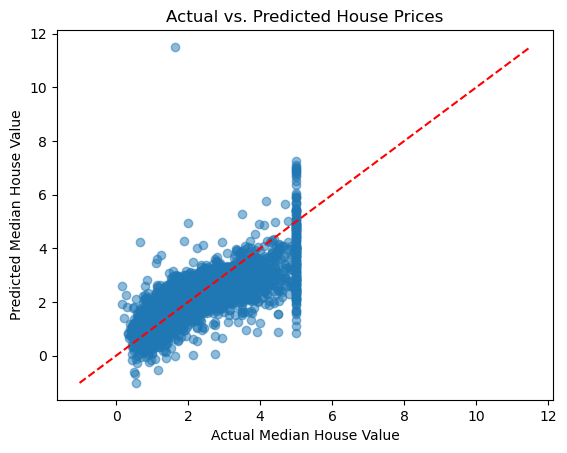

In [10]:
#make scatter plot
plt.scatter(y_test, y_pred, alpha=0.5) #alpha=0.5 makes points semi‑transparent so overlapping points are visible

#min max values for the plot
min_val= min(y_test.min(),y_pred.min())
max_val= max(y_test.max(),y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--') #Plots a dashed red line ('r--') where predicted = actual

#label and show the plot
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs. Predicted House Prices")
plt.show()

In [11]:
!pip freeze > requirements.txt